In [1]:
from imports import *
%matplotlib inline

Welcome to JupyROOT 6.28/10


In [2]:
def genGauss(x, scale=1, alpha=1, beta=2, mu=0):
    return np.exp(-(abs(x-mu)/alpha)**beta)

def genGauss2D(pos, **kwargs):
    if "x0" in kwargs and "y0" in kwargs:    # There's probably a better way
        kwargs["mu"] = sqrt(kwargs["x0"]**2 + kwargs["y0"]**2)

    return genGauss(np.sqrt(pos[0]**2+pos[1]**2), kwargs)

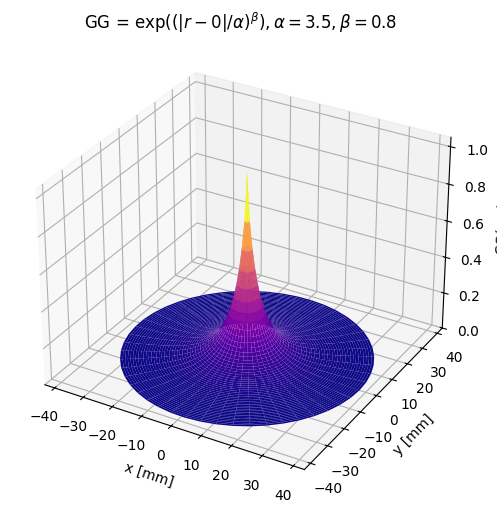

In [3]:
# Generate a 3D plot of the generalized Gaussian, with surface lines in r,phi
# ***WARNING*** Requires matplotlib 3.9.0, or something later than 3.0.0!

alpha=3.5
beta=0.8
x0,y0 = (0,0)      # This will be center point later

# Create the mesh in polar coordinates (R is millimeters for CDMSlite)
r = np.linspace(0., 38., 50)
p = np.linspace(0., 2*np.pi, 50)
R,P = np.meshgrid(r, p)

Z = genGauss(R, alpha=alpha, beta=beta)

# Convert the mesh to cartesian for drawing
X,Y = R*np.cos(P), R*np.sin(P)

# This plot will show a surface grid, and a shaded surface shape
ax = plt.figure(figsize=(9,6)).add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.plasma)

ax.set_zlim(0, 1.05)
ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
ax.set_zlabel("GG(x,y)")
ax.set_title(r"GG = $\exp((|r-0|/\alpha)^\beta), \alpha={0}, \beta={1}$".format(alpha,beta))

plt.savefig("genGauss_3D.png")